In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression, RidgeCV
from scipy.stats import norm

train = pd.read_csv('house-prices-advanced-regression-techniques\\train.csv', usecols=[1, 17, 18, 19, 43, 44, 46, 49, 50, 61, 62, 70, 77, 80])
test  = pd.read_csv('house-prices-advanced-regression-techniques\\test.csv', usecols=[1, 17, 18, 19, 43, 44, 46, 49, 50, 61, 62, 70, 77])

In [2]:
train = pd.get_dummies(train)

In [26]:
train.isnull().sum()[train.isnull().sum()>0]

Series([], dtype: int64)

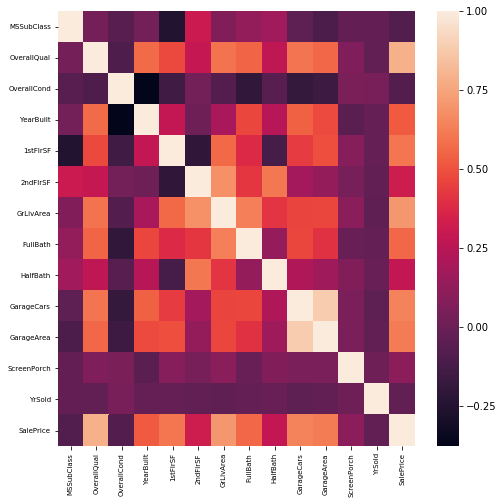

In [3]:
corr = train.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr)
plt.yticks(rotation=0, size=7)
plt.xticks(rotation=90, size=7)
plt.show()

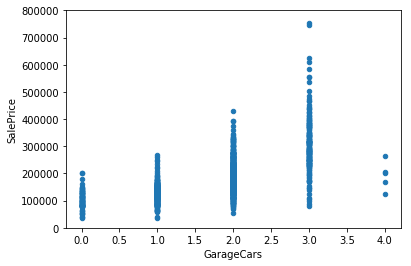

In [4]:
var = 'GarageCars'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

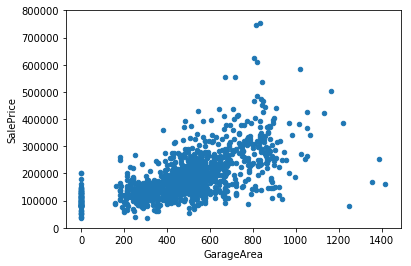

In [5]:
var1 = 'GarageArea'
data = pd.concat([train['SalePrice'], train[var1]], axis=1)
data.plot.scatter(x=var1, y='SalePrice', ylim=(0,800000));

In [6]:
train = train.drop(train[(train['GarageArea']>1000) & (train['SalePrice']<500000)].index)

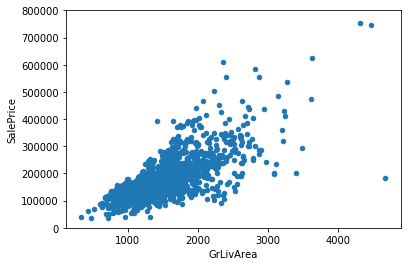

In [7]:
var2 = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var2]], axis=1)
data.plot.scatter(x=var2, y='SalePrice', ylim=(0,800000));

In [8]:
train = train.drop(train[(train['GrLivArea']>3000) & (train['SalePrice']<350000)].index)

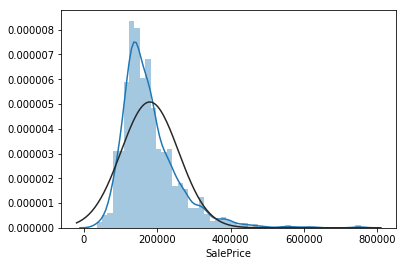

<Figure size 432x288 with 0 Axes>

In [9]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()

In [10]:
#log transformations 
#train['SalePrice'] = np.log(train['SalePrice'])

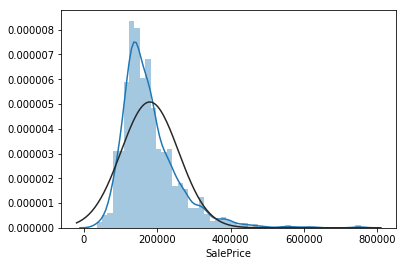

<Figure size 432x288 with 0 Axes>

In [11]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()

In [12]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=420)

#Root mean squared logarithmic error
def rmsle_cv(model):
    kf = KFold(n_splits=10, shuffle=True, random_state=420).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


In [13]:
X_train, y_train = train.loc[:, train.columns != 'SalePrice'], np.log(train['SalePrice'])

In [14]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
ridge = make_pipeline(RobustScaler(), RidgeCV(cv=kfolds))
rf=RandomForestRegressor()
lr=LinearRegression()
tree=DecisionTreeRegressor(random_state=1,max_depth=4)

In [15]:
ridge_score = rmsle_cv(ridge)
print("Ridge: ",ridge_score.mean(),ridge_score.std())

lasso_score = rmsle_cv(lasso)
print("Lasso: ",lasso_score.mean(), lasso_score.std())

elasticnet_score = rmsle_cv(ENet)
print("ENet: ",elasticnet_score.mean(), elasticnet_score.std())

KRR_score = rmsle_cv(KRR)
print("KRR: ",KRR_score.mean(), KRR_score.std())

GBoost_score = rmsle_cv(GBoost)
print("GBoost: ",GBoost_score.mean(), GBoost_score.std())

rf_score = rmsle_cv(rf)
print("Random Forest: ",rf_score.mean(), rf_score.std())

lr_score = rmsle_cv(lr)
print("Linear Regression: ",lr_score.mean(), lr_score.std())

tree_score = rmsle_cv(tree)
print("Decision Tree: ",tree_score.mean(), tree_score.std())

Ridge:  0.10014029471752098 0.013443800959802892
Lasso:  0.10018004754367034 0.013880482879541117
ENet:  0.10017515301145001 0.013868119470502436


C:\Users\btam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\btam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\btam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\btam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matr

KRR:  0.11858431928843341 0.061688736229492426
GBoost:  0.040065296464866715 0.011437139086022906


C:\Users\btam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\btam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\btam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\btam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

Random Forest:  0.009674185284762573 0.0053492872092765174
Linear Regression:  0.10019185686665415 0.013830735776106506
Decision Tree:  0.040587574823291325 0.004868940874780287


In [16]:
lasso_model = lasso.fit(X_train,y_train)
ridge_model = ridge.fit(X_train,y_train)
elasticnet_model = ENet.fit(X_train,y_train)
KRR_model = KRR.fit(X_train,y_train)
GBoost_model = GBoost.fit(X_train,y_train)
randomforest_model = rf.fit(X_train,y_train)
lr_model = lr.fit(X_train,y_train)
tree_model =tree.fit(X_train,y_train)

C:\Users\btam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:165: LinAlgWarning: Ill-conditioned matrix (rcond=1.87101e-17): result may not be accurate.
  overwrite_a=False)
C:\Users\btam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [17]:
def blend_models(X):
    return (
        ((.2) * lasso_model.predict(X)) +
        ((.2) * ridge_model.predict(X)) +
        ((.2) * elasticnet_model.predict(X)) +
        ((.2) * KRR_model.predict(X)) +
        ((.2) * GBoost_model.predict(X))
           )

In [18]:
print(rmsle(y_train,blend_models(X_train)))

0.12134511058286417


In [19]:
X_train.shape

(1440, 13)

In [20]:
y_train.shape

(1440,)

In [21]:
test.fillna(train.mean(), inplace=True)
test['Prediction']=blend_models(test)

In [22]:
test.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,GarageCars,GarageArea,ScreenPorch,YrSold,Prediction
0,20,5,6,1961,896,0,896,1,0,1.0,730.0,120,2010,11.782826
1,20,6,6,1958,1329,0,1329,1,1,1.0,312.0,0,2010,11.946670
2,60,5,5,1997,928,701,1629,2,1,2.0,482.0,0,2010,12.028884
3,60,6,6,1998,926,678,1604,2,1,2.0,470.0,0,2010,12.145934
4,120,8,5,1992,1280,0,1280,2,0,2.0,506.0,144,2010,12.202443


In [23]:
np.exp(test.Prediction)

0       130983.398844
1       154302.421129
2       167524.287728
3       188326.776627
4       199275.484687
5       171969.057700
6       177913.571248
7       166007.391312
8       191550.099810
9       109948.110264
10      184920.556182
11      105664.025425
12      101447.098091
13      150648.675272
14      134111.539126
15      366100.830869
16      266338.049061
17      304274.519587
18      284016.335293
19      474195.876710
20      313855.341954
21      210424.208598
22      179201.596292
23      170204.330633
24      171697.174265
25      200909.798831
26      360783.149123
27      264885.771215
28      198690.930582
29      205170.352781
            ...      
1429     80150.578355
1430    142956.989685
1431     71011.629674
1432    117139.156626
1433     65499.333917
1434    268162.884332
1435    256819.142783
1436    201272.645857
1437    176117.516224
1438    230127.734924
1439    159036.893950
1440    191062.372987
1441    182479.848993
1442    316638.507439
1443    32

In [24]:
output=pd.DataFrame({
    'Id':np.arange(1461,2920),
    'SalePrice':np.exp(test.Prediction)
})

In [25]:
output.to_csv('house-prices-advanced-regression-techniques\\bt_prediction20.csv',index=False)